# Case Study 1 : Super Conductor

Submitted by:

- Ravi Sivaraman
- Balaji Avvaru
- Apurv Mittal

The code for importing the data is combined with the inital loading of various analysis and visualization packages below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

#### Read and alalyze train csv file

In [2]:
# read train csv files
train_df = pd.read_csv('train.csv')

# critical_temp is part of both csv files drop critical_temp from train dataframe
train_df.drop(['critical_temp'], inplace=True, axis=1)

In [3]:
# Validate null vsalues in train csv file
train_df.isnull().sum().sum()

0

In [4]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
# to drop features with colliniarity more than 95%
pd.set_option('display.max_rows', 100)

corr_df = pd.DataFrame(train_df.corr().abs())
corr_df.head(100)

number_of_elements  mean_atomic_mass  \
number_of_elements                         1.000000          0.141923   
mean_atomic_mass                           0.141923          1.000000   
wtd_mean_atomic_mass                       0.353064          0.815977   
gmean_atomic_mass                          0.292969          0.940298   
wtd_gmean_atomic_mass                      0.454525          0.745841   
entropy_atomic_mass                        0.939304          0.104000   
wtd_entropy_atomic_mass                    0.881845          0.097609   
range_atomic_mass                          0.682777          0.125659   
wtd_range_atomic_mass                      0.320293          0.446225   
std_atomic_mass                            0.513998          0.196460   
wtd_std_atomic_mass                        0.546391          0.130675   
mean_fie                                   0.167451          0.285782   
wtd_mean_fie                               0.484445          0.222097   
gmean_fie                                  0.024229          0.240565   
wtd_gmean_fie                              0.424152          0.219381   
entropy_fie                                0.973195          0.166935   
wtd_entropy_fie                            0.719209          0.163565   
range_fie                                  0.781227          0.255628   
wtd_range_fie                              0.329624          0.080545   
std_fie                                    0.674005          0.276561   
wtd_std_fie                                0.717831          0.222812   
mean_atomic_radius                         0.001389          0.497664   
wtd_mean_atomic_radius                     0.422144          0.376760   
gmean_atomic_radius                        0.240444          0.561061   
wtd_gmean_atomic_radius                    0.518256          0.359894   
entropy_atomic_radius                      0.972245          0.140034   
wtd_entropy_atomic_radius                  0.904121          0.147604   
range_atomic_radius                        0.768060          0.270695   
wtd_range_atomic_radius                    0.371350          0.141100   
std_atomic_radius                          0.624810          0.326403   
wtd_std_atomic_radius                      0.695089          0.280440   
mean_Density                               0.418675          0.756861   
wtd_mean_Density                           0.507895          0.608935   
gmean_Density                              0.630504          0.596485   
wtd_gmean_Density                          0.649882          0.525588   
entropy_Density                            0.871832          0.043416   
wtd_entropy_Density                        0.767078          0.026325   
range_Density                              0.413486          0.198067   
wtd_range_Density                          0.355389          0.342391   
std_Density                                0.210724          0.245042   
wtd_std_Density                            0.334072          0.180943   
mean_ElectronAffinity                      0.119303          0.088230   
wtd_mean_ElectronAffinity                  0.195608          0.061103   
gmean_ElectronAffinity                     0.356067          0.189282   
wtd_gmean_ElectronAffinity                 0.052884          0.134382   
entropy_ElectronAffinity                   0.877304          0.091539   
wtd_entropy_ElectronAffinity               0.625798          0.107651   
range_ElectronAffinity                     0.531540          0.187069   
wtd_range_ElectronAffinity                 0.241411          0.010235   
std_ElectronAffinity                       0.423738          0.164960   
wtd_std_ElectronAffinity                   0.480813          0.133101   
mean_FusionHeat                            0.437624          0.137669   
wtd_mean_FusionHeat                        0.449272          0.135429   
gmean_FusionHeat                           0.514252          0.014818   
wtd_gmean_FusionHe

In [5]:
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
print(upper_tri)

                                 number_of_elements  mean_atomic_mass  \
number_of_elements                              NaN          0.141923   
mean_atomic_mass                                NaN               NaN   
wtd_mean_atomic_mass                            NaN               NaN   
gmean_atomic_mass                               NaN               NaN   
wtd_gmean_atomic_mass                           NaN               NaN   
entropy_atomic_mass                             NaN               NaN   
wtd_entropy_atomic_mass                         NaN               NaN   
range_atomic_mass                               NaN               NaN   
wtd_range_atomic_mass                           NaN               NaN   
std_atomic_mass                                 NaN               NaN   
wtd_std_atomic_mass                             NaN               NaN   
mean_fie                                        NaN               NaN   
wtd_mean_fie                                    NaN

In [6]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print((to_drop))


['wtd_gmean_atomic_mass', 'std_atomic_mass', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'std_fie', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'wtd_gmean_Density', 'std_Density', 'std_ElectronAffinity', 'wtd_gmean_FusionHeat', 'std_FusionHeat', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'std_Valence']


In [7]:
train_df_cleaned = train_df.drop(to_drop, axis=1)
train_df_cleaned.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  \
0          66.361592             1.181795                 1.062396   
1          73.132787             1.449309                 1.057755   
2          66.361592             1.181795                 0.975980   
3          66.361592             1.181795                 1.022291   
4          66.361592             1.181795                 1.129224   

   range_atomic_mass  wtd_range_atomic_mass  wtd_std_atomic_mass  mean_fie  \
0          122.90607              31.794921            53.622535   775.425   
1          122.90607              36.161939            53.979870   766.440   
2          122.90607              35.741099            53.656268   775.425   
3          122.90607              33.768010            53.639405   775.425   
4          122.90607              27.848743            53.588771   775.425   

   ...  wtd_gmean_ThermalConductivity  entropy_ThermalConductivity  \
0  ...                       0.621979                     0.308148   
1  ...                       0.619735                     0.847404   
2  ...                       0.619095                     0.308148   
3  ...                       0.620535                     0.308148   
4  ...                       0.624878                     0.308148   

   wtd_entropy_ThermalConductivity  range_ThermalConductivity  \
0                         0.262848                  399.97342   
1                         0.567706                  429.97342   
2                         0.250477                  399.97342   
3                         0.257045                  399.97342   
4                         0.272820                  399.97342   

   wtd_range_ThermalConductivity  mean_Valence  wtd_mean_Valence  \
0                      57.127669          2.25          2.257143   
1                      51.413383          2.00          2.257143   
2                      57.127669          2.25          2.271429   
3                      57.127669          2.25          2.264286   
4                      57.127669          2.25          2.242857   

   range_Valence  wtd_range_Valence  wtd_std_Valence  
0              1           1.085714         0.437059  
1              2           1.128571         0.468606  
2              1           1.114286         0.444697  
3              1           1.100000         0.440952  
4              1           1.057143         0.428809  

[5 rows x 58 columns]

Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

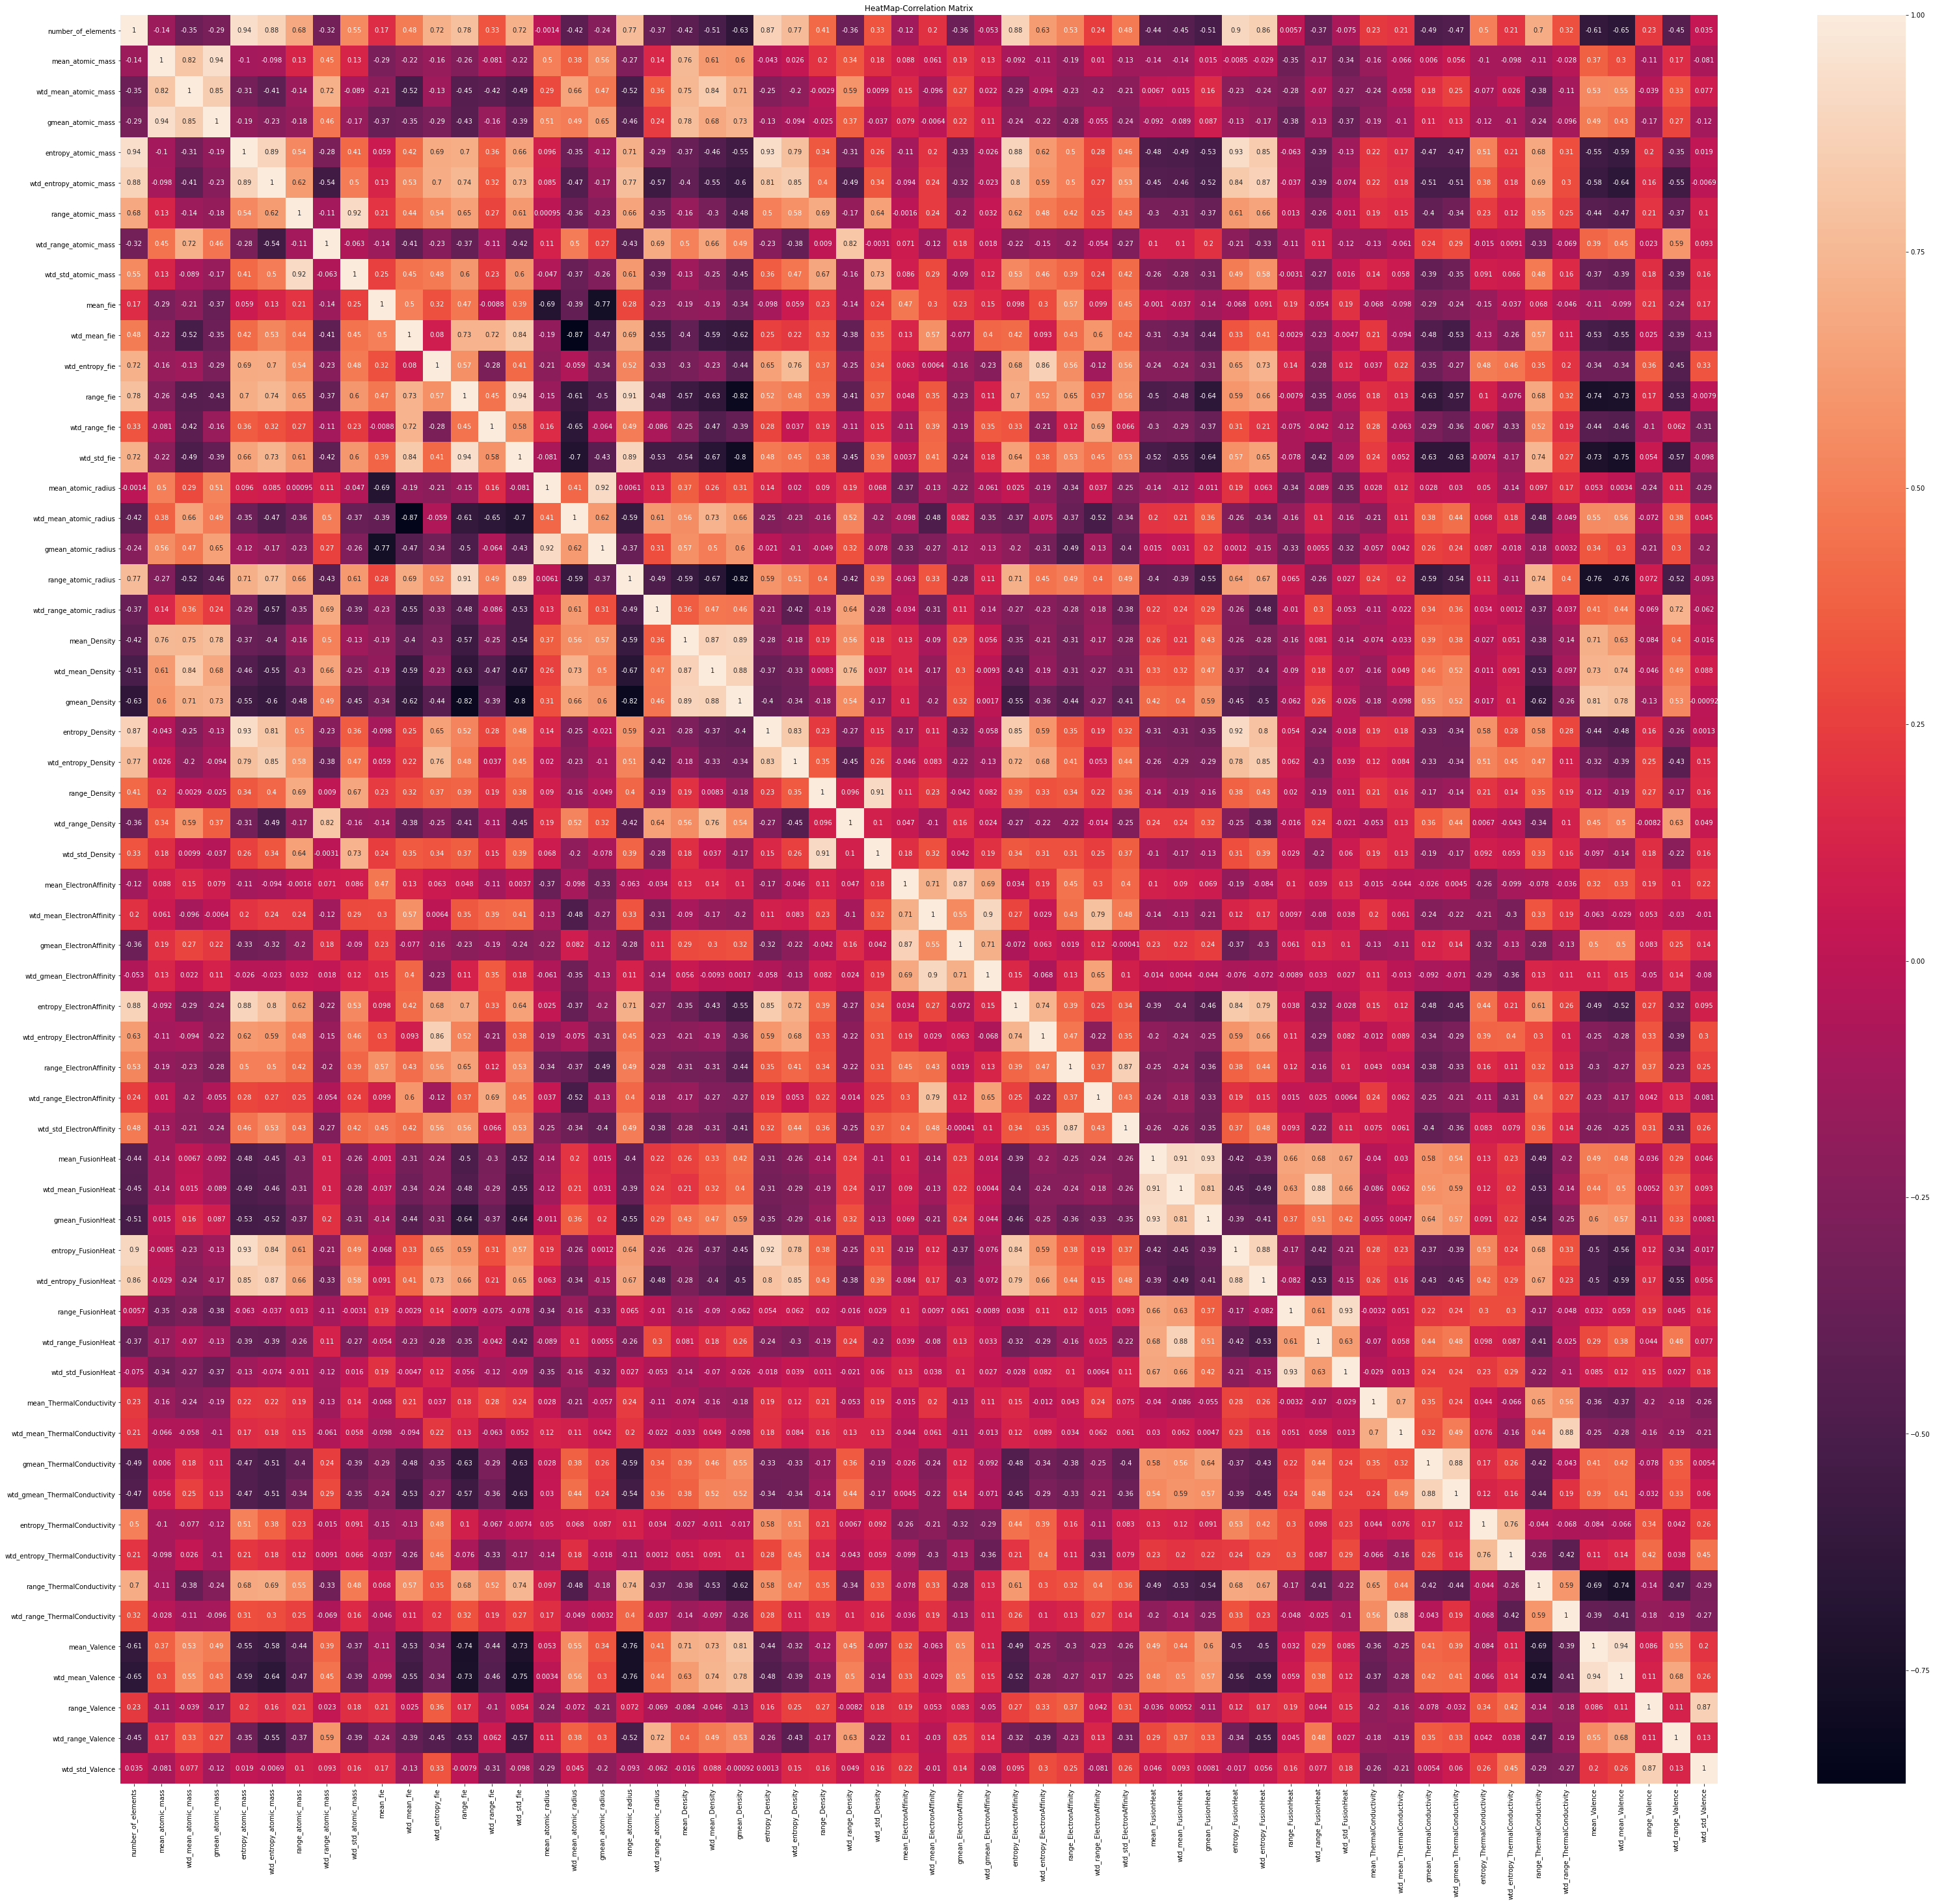

In [8]:
#heatmap - correlation matrix
plt.figure(figsize=(55, 50)) #code reference (5-1)
sns.heatmap(train_df_cleaned.corr(), annot=True)
plt.title('HeatMap-Correlation Matrix')

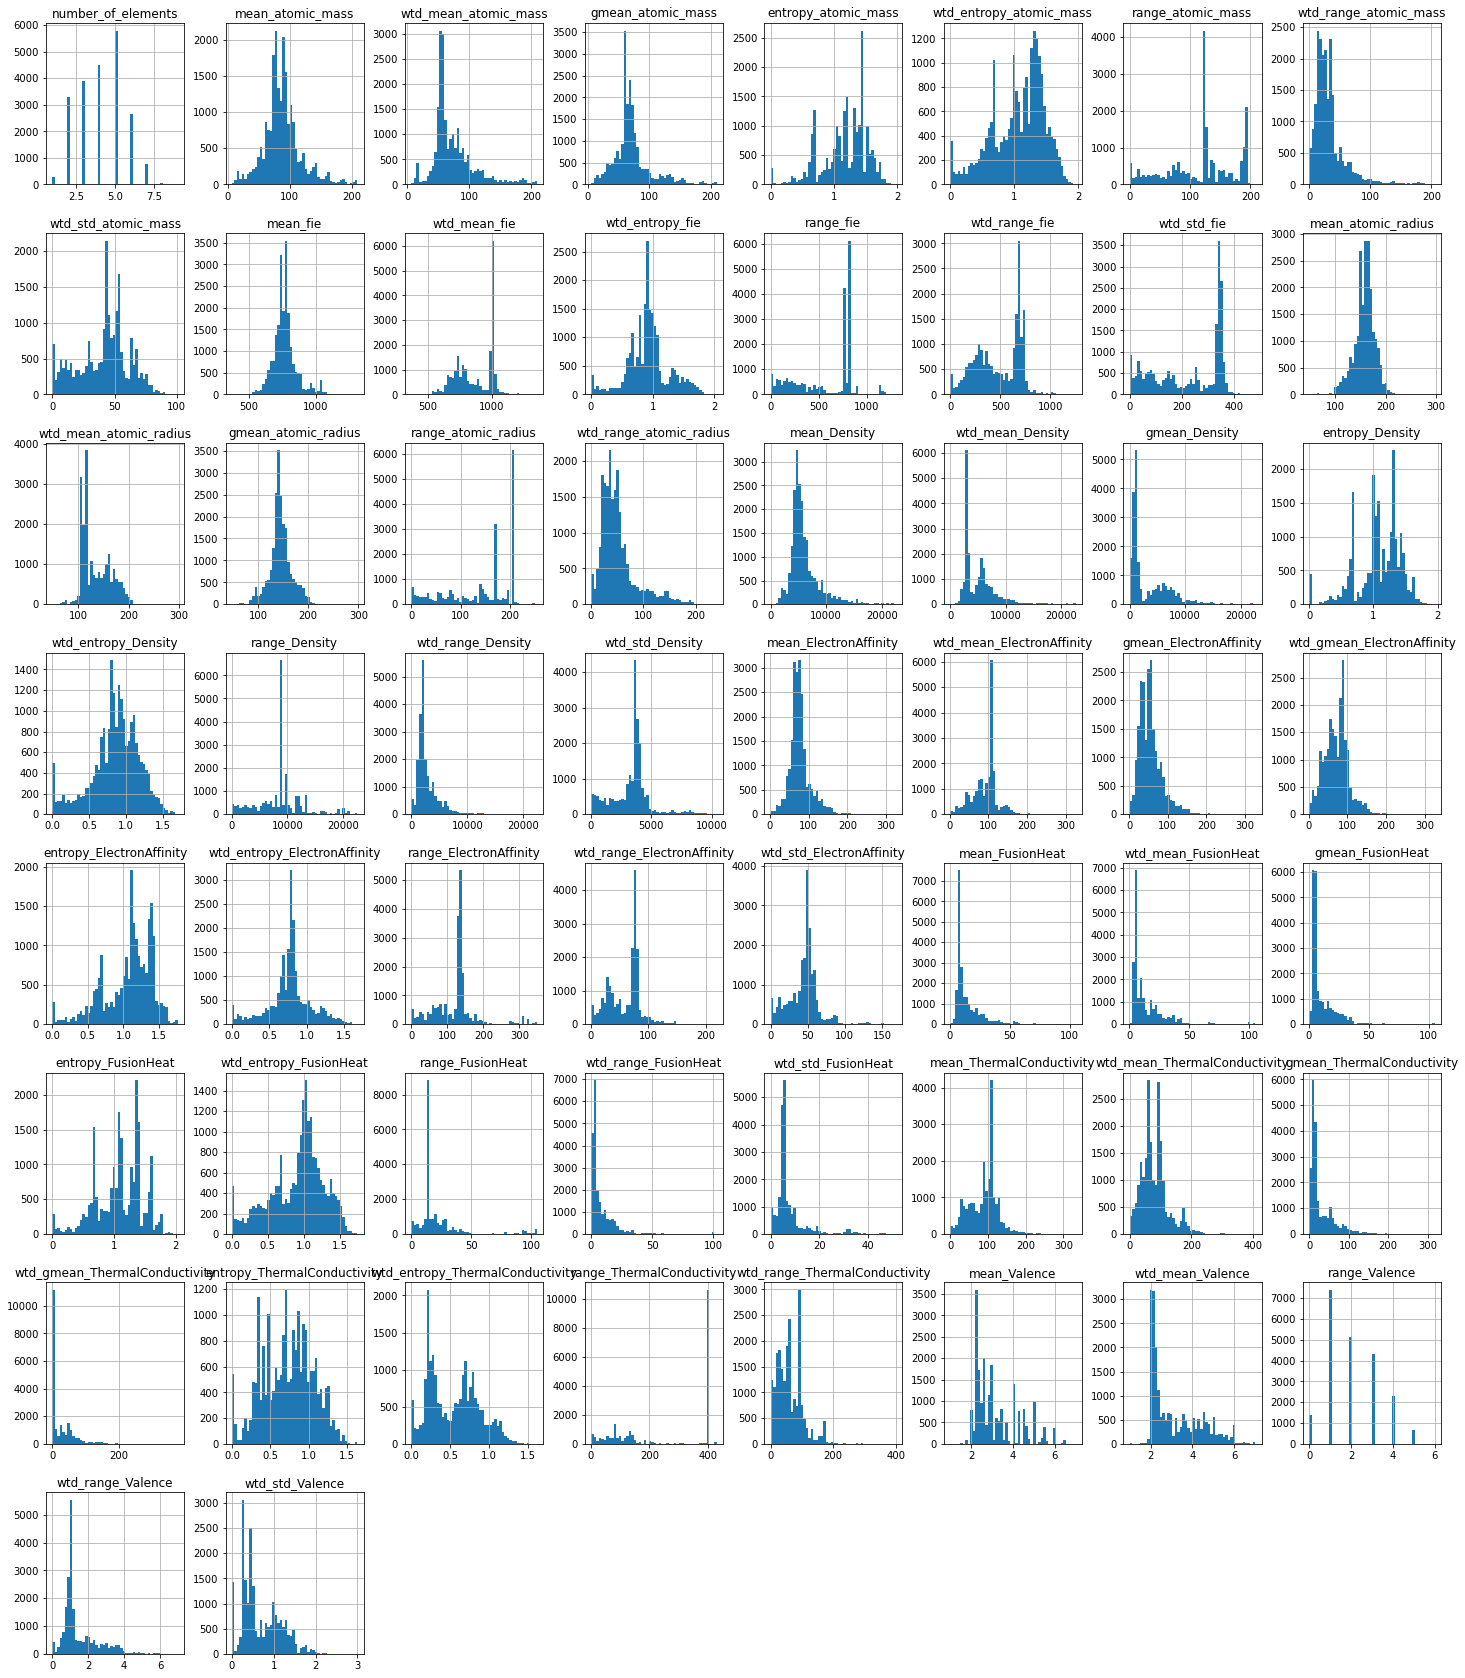

In [10]:
#Visualizing the hist of data
train_df_cleaned.hist(bins=50,figsize=(25,30))
plt.show()

#### Read and analyze unique_m csv file

In [11]:
# read unique_m csv files
unique_m_df = pd.read_csv('unique_m.csv')

The "material" column which comprises of all elements used as materials, it is not useful to us so we will drop it from our data frame. This will also help to reduce the size of any pairwise comparisons without additional restricting.

In [12]:
unique_m_df.drop(['material'], inplace=True, axis=1)
unique_m_df.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Pt   Au   Hg   Tl  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Pb   Bi  Po  At  Rn  critical_temp  
0  0.0  0.0   0   0   0           29.0  
1  0.0  0.0   0   0   0           26.0  
2  0.0  0.0   0   0   0           19.0  
3  0.0  0.0   0   0   0           22.0  
4  0.0  0.0   0   0   0           23.0  

[5 rows x 87 columns]

In [13]:
# Validate null vsalues in unique_m csv file
unique_m_df.isnull().sum().sum()

0

In [14]:
# Passing a value of zero for the parameter will filter all the features with zero variance.
constant_filter = VarianceThreshold(threshold=0)

# apply this filter to our dataframe
constant_filter.fit(unique_m_df)

# get_support() method will give the number of non-constant features.
len(unique_m_df.columns[constant_filter.get_support()])

# get columns names of non constant columns
non_constant_columns = [column for column in unique_m_df.columns
                    if column in unique_m_df.columns[constant_filter.get_support()]]

print(len(non_constant_columns))

unique_m_df_cleaned = pd.DataFrame(constant_filter.transform(unique_m_df), columns=non_constant_columns)
unique_m_df_cleaned.shape

78


(21263, 78)

Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

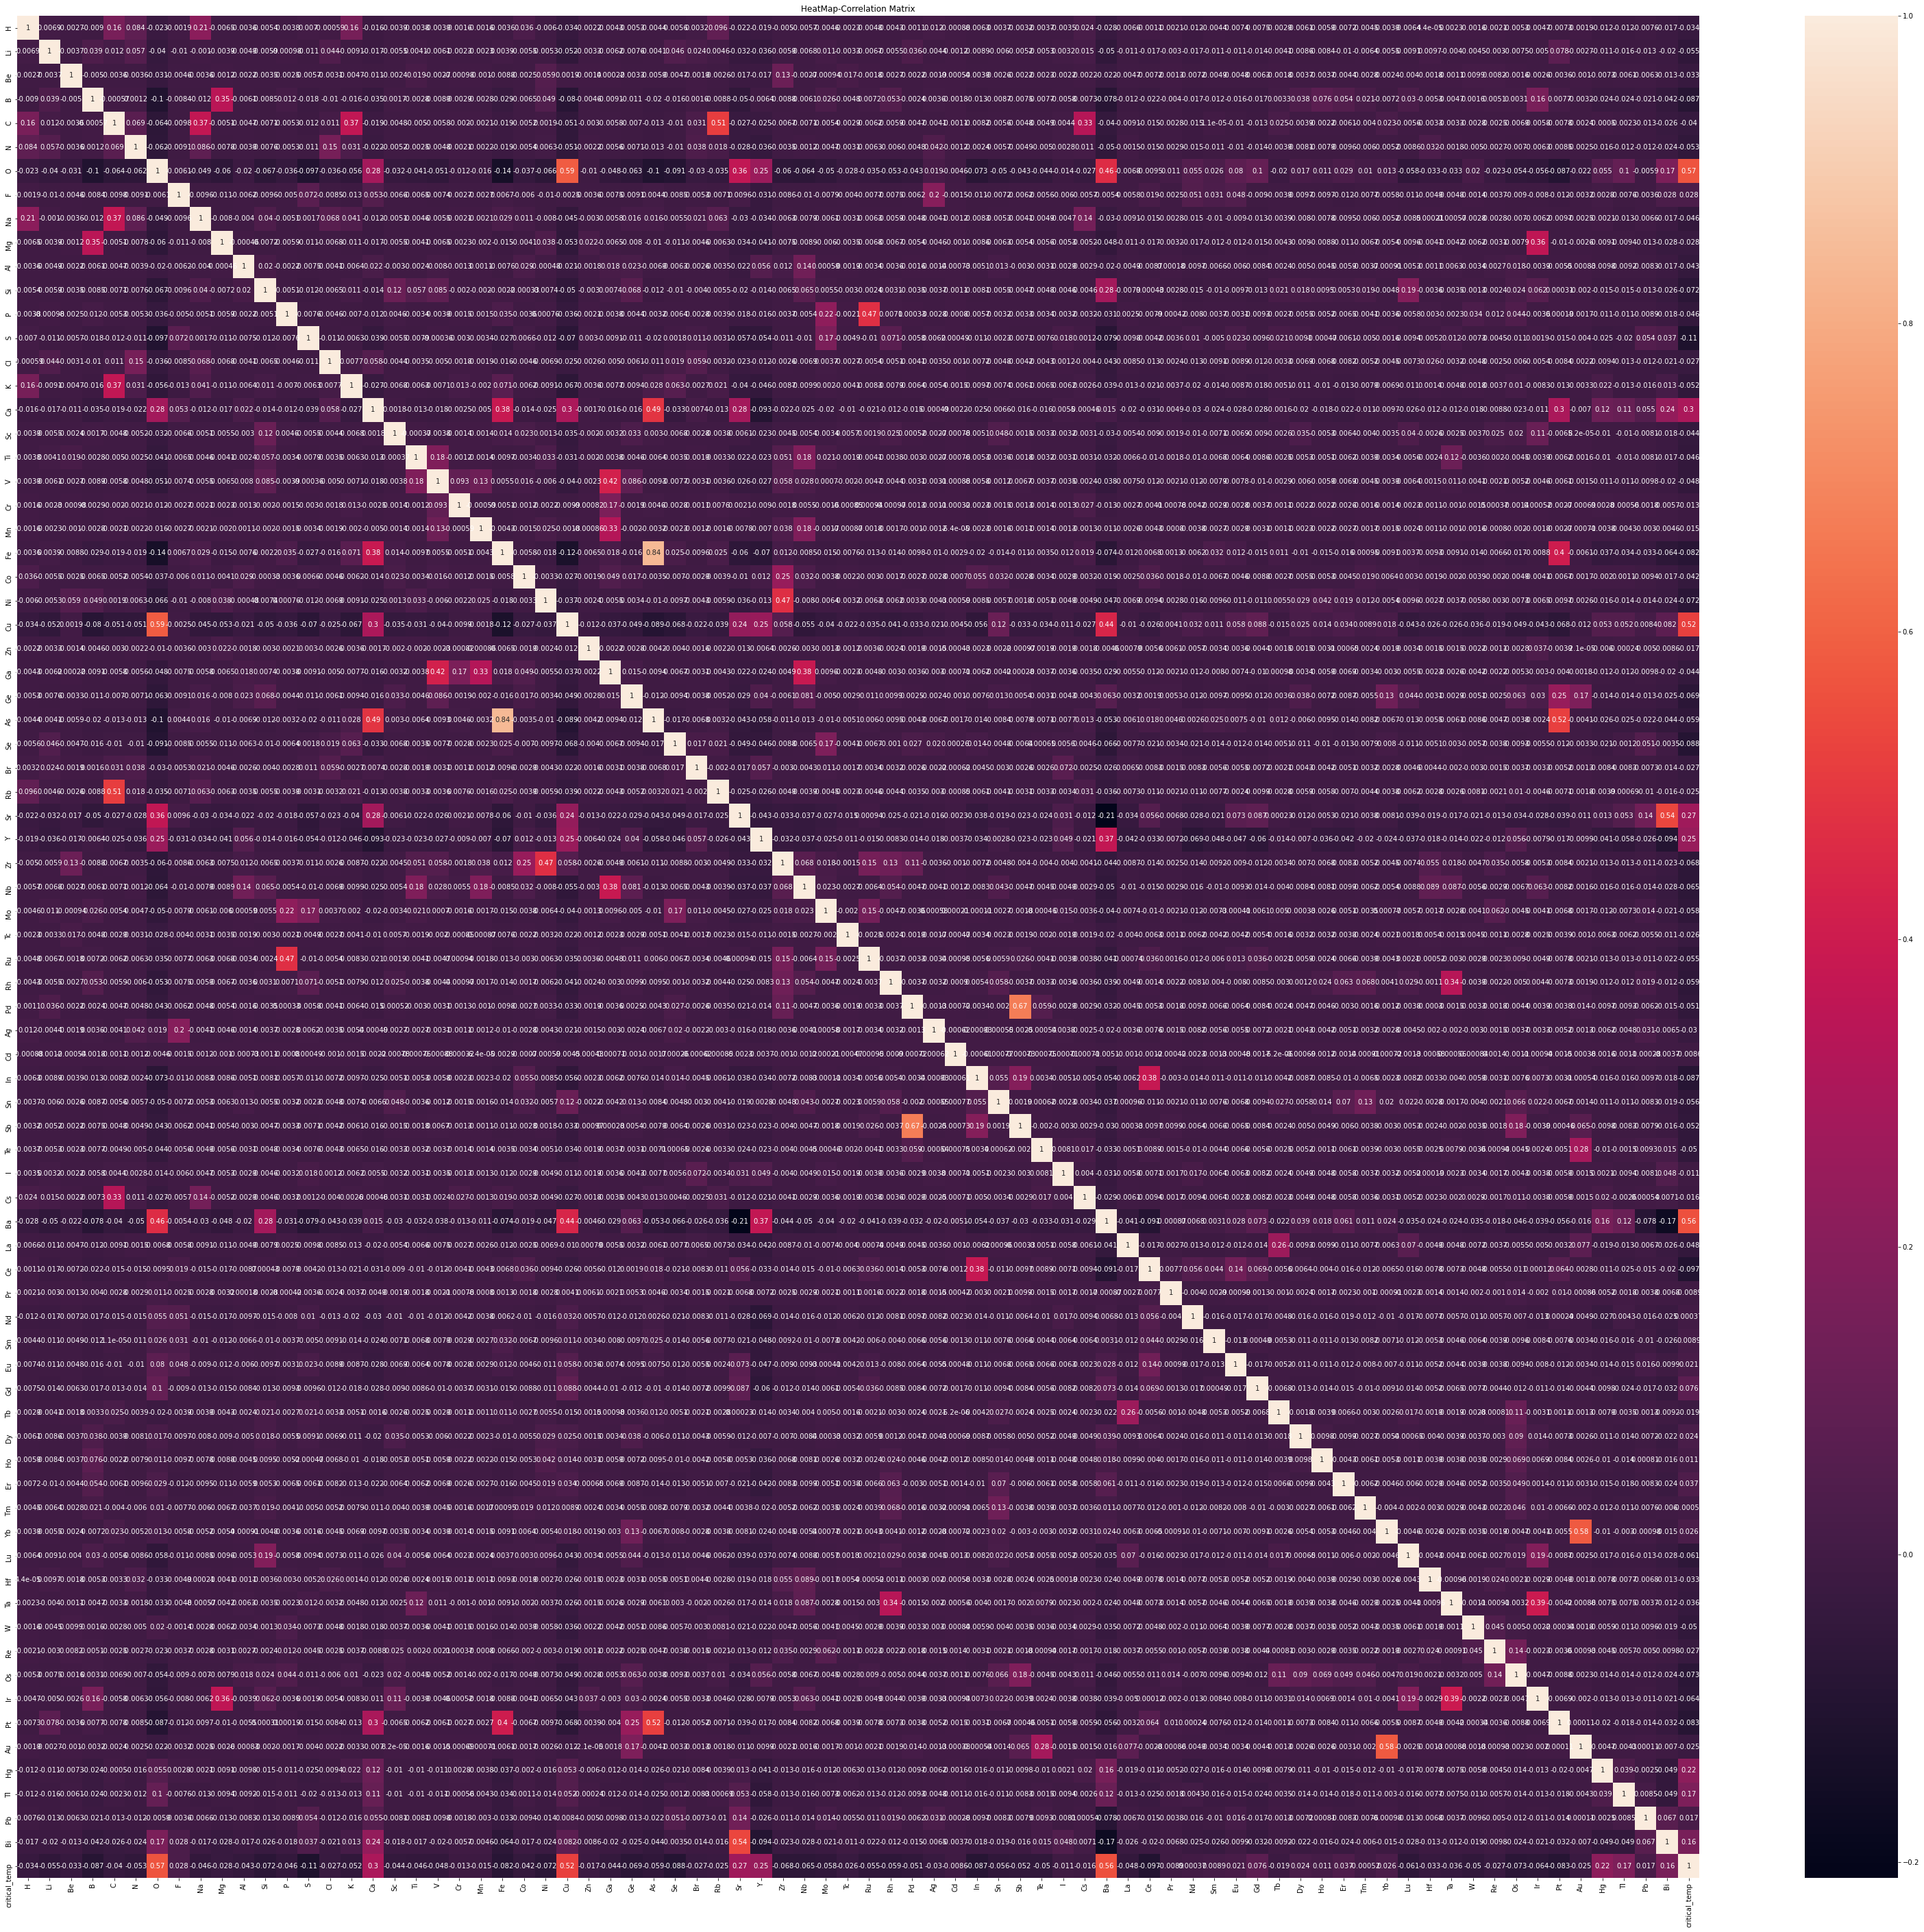

In [15]:
#heatmap - correlation matrix
plt.figure(figsize=(55, 50)) #code reference (5-1)
sns.heatmap(unique_m_df_cleaned.corr(), annot=True)
plt.title('HeatMap-Correlation Matrix')

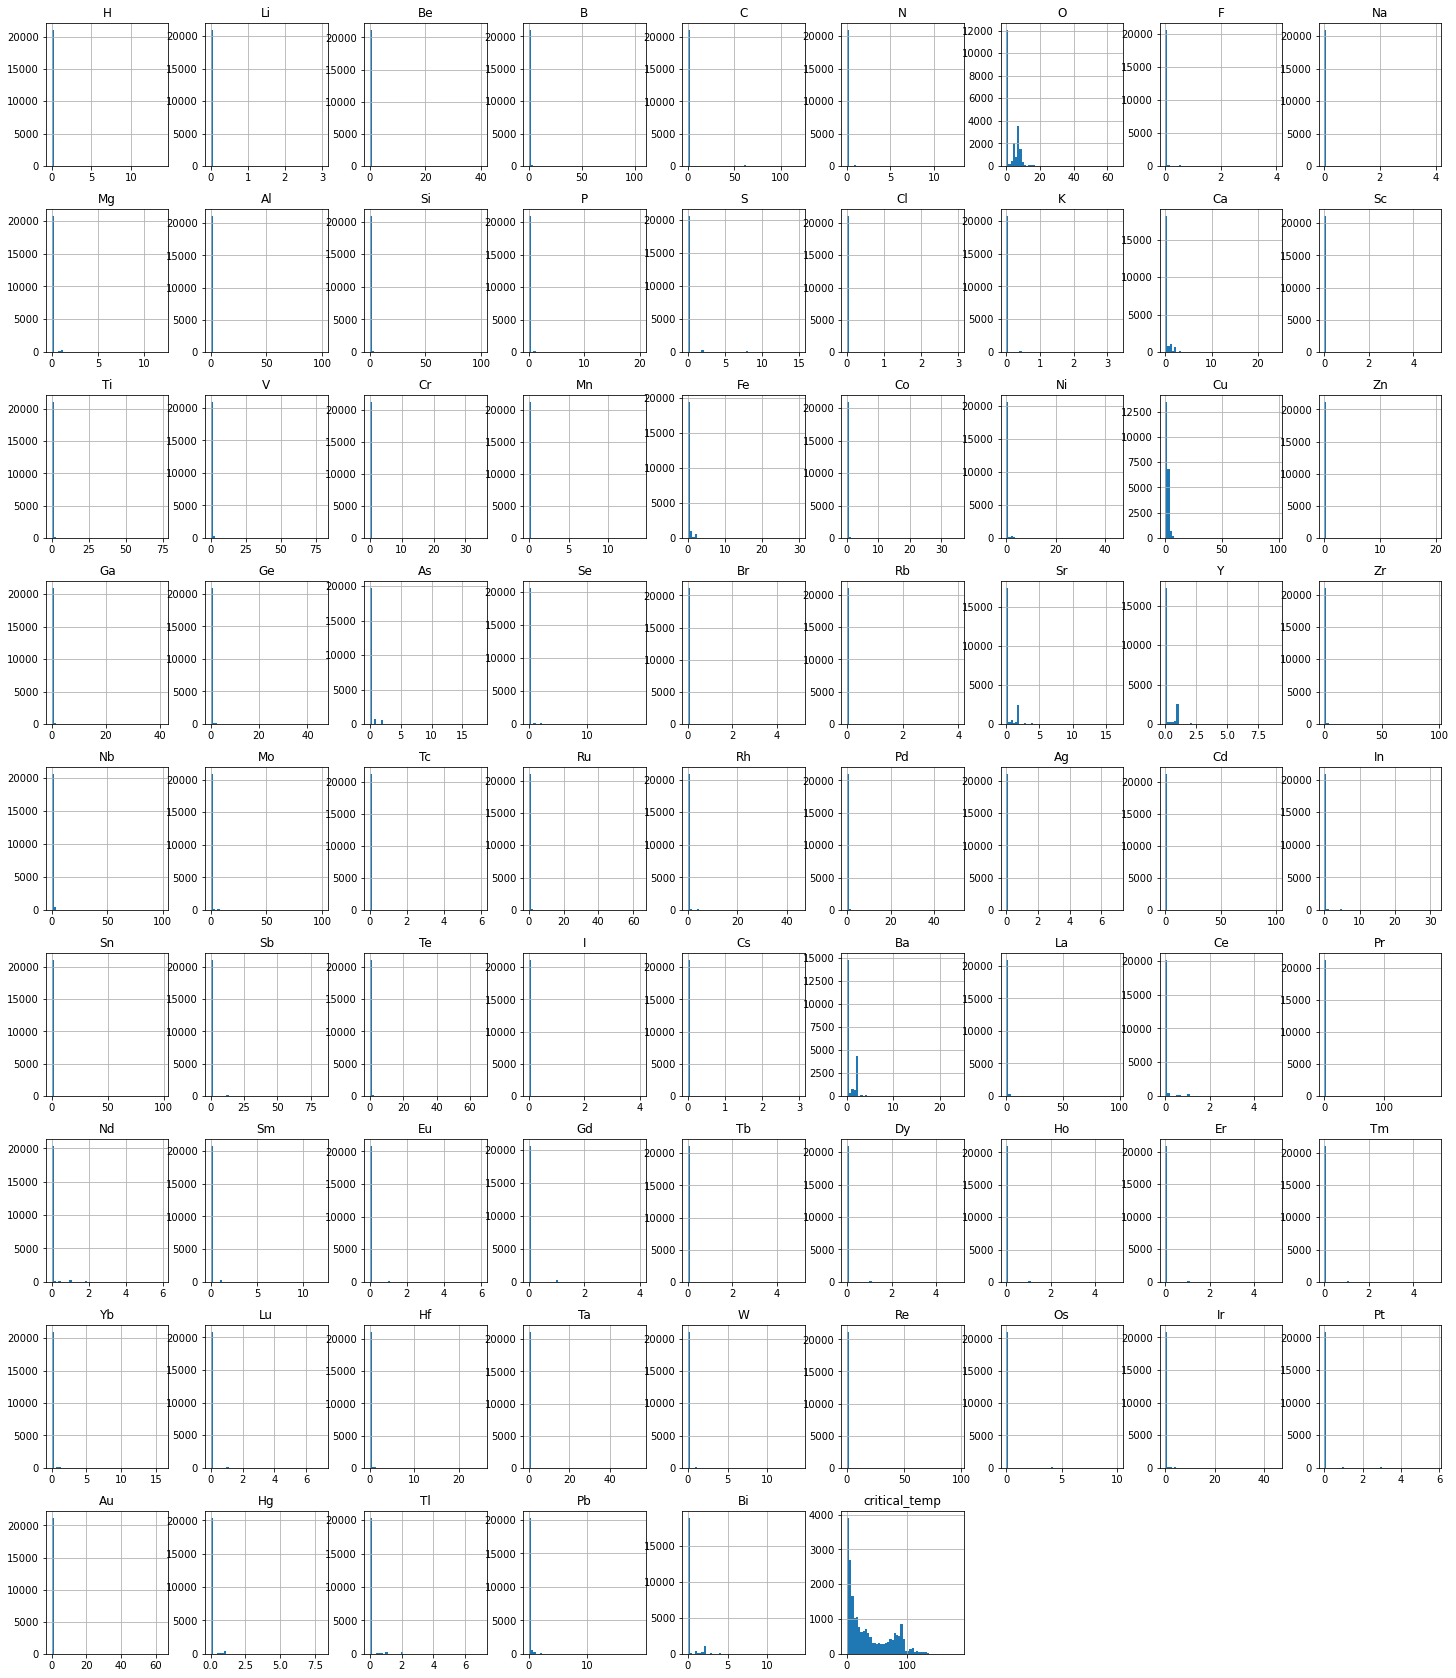

In [16]:
#Visualizing the hist of data
unique_m_df_cleaned.hist(bins=50,figsize=(25,30))
plt.show()

Most of the columns in unique_m data frame having value ZERO for most of the observations which is the reason for high multicollinearity among independent features

#### Concatenate both csv files

In [17]:
df = pd.concat([train_df_cleaned,unique_m_df_cleaned],axis=1)
df.shape

(21263, 136)

In [18]:
X = df.drop(['critical_temp'],axis=1)
ind_columns = df.drop('critical_temp',axis=1).columns
y = df['critical_temp']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Multiple Linear Regression

In [20]:
cv = KFold(n_splits=10, random_state=1234, shuffle=True)

# Regression Model
mlr = linear_model.LinearRegression().fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
mlr_preds = cross_val_predict(mlr, X_scaled, y, cv=cv)
mlr_scores = cross_val_score(mlr, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(mlr_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(mlr_scores))

Average of RMSE for 10 folds:  -22.055829607436607
Standard Deviation of RMSE for 10 folds:  9.715667888953623


<Figure size 864x576 with 0 Axes>

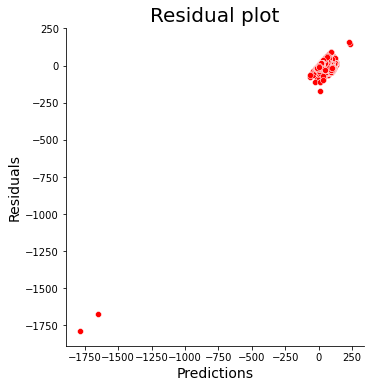

In [23]:
rezdf = df
rezdf['preds'] = mlr_preds
rezdf['resids'] = (rezdf['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf, color='red')
plt.title('Residual plot', size=20)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

Text(0.5, 0, 'Errors')

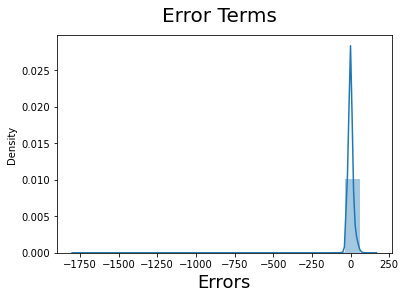

In [24]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [25]:
# intercept and regression model coefficients
coef2 = mlr.coef_.tolist()
coefdf2 = pd.DataFrame(ind_columns, columns=['Variable'])
coefdf2['Coefficient'] = coef2

print('Intercept: \n', mlr.intercept_)
coefdf2

Intercept: 
 34.4212191353525


Variable  Coefficient
0      number_of_elements     1.153375
1        mean_atomic_mass     7.661571
2    wtd_mean_atomic_mass   -16.673509
3       gmean_atomic_mass     4.685669
4     entropy_atomic_mass    -4.916978
..                    ...          ...
130                    Au    -0.422068
131                    Hg     1.312239
132                    Tl     1.109473
133                    Pb     0.260367
134                    Bi     4.350212

[135 rows x 2 columns]

#### LASSO

In [26]:
lasso_reg = Lasso()
param_grid = {'alpha':[0.001, 0.005,  0.01, 0.03,  0.1, 0.3, 0.6, 1]}
#param_grid = {'alpha':[0.001, 0.005]}
grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='neg_root_mean_squared_error')


In [27]:
%%time
grid_result_lasso = grid_search_lasso.fit(X_scaled, y)
# summarize results
print("Best: %f using %s" % (grid_result_lasso.best_score_, grid_result_lasso.best_params_))
means = grid_result_lasso.cv_results_['mean_test_score']
stds = grid_result_lasso.cv_results_['std_test_score']
params = grid_result_lasso.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970949.0579799917, tolerance: 2240.0953231225776
  model = cd_fast.enet_coordinate_descent(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 929350.1821379582, tolerance: 2239.2267658934443
  model = cd_fast.enet_coordinate_descent(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921257.3325822251, tolerance: 2233.824808650197
  model = cd_fast.enet_coordinate_descent(
/Users/apurv/opt/anaconda3/envs/msds/lib/

Best: -17.970847 using {'alpha': 0.3}
-22.002681 (9.606718) with: {'alpha': 0.001}
-21.793443 (9.179097) with: {'alpha': 0.005}
-21.537552 (8.663455) with: {'alpha': 0.01}
-20.491645 (6.661359) with: {'alpha': 0.03}
-18.658748 (3.514706) with: {'alpha': 0.1}
-17.970847 (0.283807) with: {'alpha': 0.3}
-18.464772 (0.271713) with: {'alpha': 0.6}
-18.877960 (0.245289) with: {'alpha': 1}
CPU times: user 1.54 s, sys: 221 ms, total: 1.76 s
Wall time: 53.3 s


In [28]:
lasso_reg_best = Lasso(alpha = 0.3)

# Lasso Regression Model
lasso = lasso_reg_best.fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
lasso_preds = cross_val_predict(lasso, X_scaled, y, cv=cv)
lasso_scores = cross_val_score(lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(lasso_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(lasso_scores))

Average of RMSE for 10 folds:  -17.970846513655154
Standard Deviation of RMSE for 10 folds:  0.28380708697443796


<Figure size 864x576 with 0 Axes>

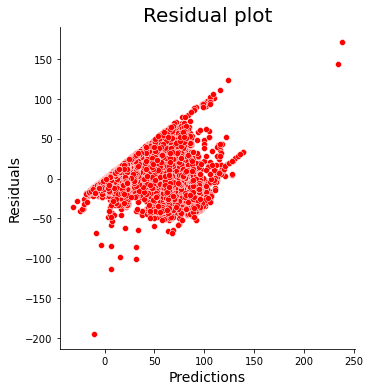

In [29]:
rezdf_lasso = df
rezdf_lasso['preds'] = lasso_preds
rezdf_lasso['resids'] = (rezdf_lasso['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_lasso, color='red')
plt.title('Residual plot', size=20)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

Text(0.5, 0, 'Errors')

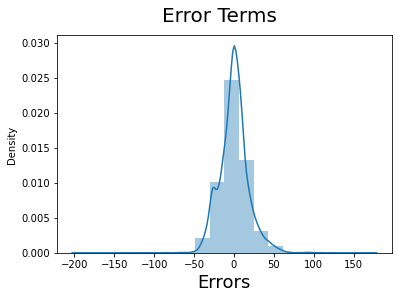

In [30]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_lasso['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [31]:
# intercept and regression model coefficients
coef2_lasso = lasso.coef_.tolist()
coefdf2_lasso = pd.DataFrame(ind_columns, columns=['Variable'])
coefdf2_lasso['Coefficient'] = coef2_lasso

print('Intercept: \n', lasso.intercept_)
coefdf2_lasso

Intercept: 
 34.421219135352494


Variable  Coefficient
0      number_of_elements     0.000000
1        mean_atomic_mass    -0.000000
2    wtd_mean_atomic_mass    -0.164587
3       gmean_atomic_mass    -0.000000
4     entropy_atomic_mass    -0.000000
..                    ...          ...
130                    Au    -0.000000
131                    Hg     1.498230
132                    Tl     1.126867
133                    Pb     0.000000
134                    Bi     3.812606

[135 rows x 2 columns]

#### Lasso Features with Coefficients

In [84]:
pd.set_option('display.max_rows', 150)

coeff= pd.DataFrame(coefdf2_lasso[coefdf2_lasso.Coefficient!=0])

coeff['Coefficient Absolute'] = coeff['Coefficient'].abs()
coeff.sort_values('Coefficient Absolute', ascending=False)

Variable  Coefficient  Coefficient Absolute
46      wtd_mean_ThermalConductivity    12.219437             12.219437
48     wtd_gmean_ThermalConductivity   -10.567000             10.567000
108                               Ba     8.764601              8.764601
6                  range_atomic_mass     5.280134              5.280134
57                   wtd_std_Valence    -4.020957              4.020957
134                               Bi     3.812606              3.812606
5            wtd_entropy_atomic_mass     3.365125              3.365125
69                                Si    -3.211962              3.211962
8                wtd_std_atomic_mass    -3.063943              3.063943
31        wtd_gmean_ElectronAffinity    -2.961759              2.961759
33      wtd_entropy_ElectronAffinity    -2.797874              2.797874
74                                Ca     2.492002              2.492002
50   wtd_entropy_ThermalConductivity     2.056064              2.056064
18               range_atomic_radius     1.735764              1.735764
9                           mean_fie     1.629927              1.629927
131                               Hg     1.498230              1.498230
22                     gmean_Density    -1.420895              1.420895
44                wtd_std_FusionHeat    -1.282186              1.282186
41            wtd_entropy_FusionHeat     1.159539              1.159539
132                               Tl     1.126867              1.126867
71                                 S    -1.051769              1.051769
100                               Ag    -0.993066              0.993066
87                                As    -0.939608              0.939608
7              wtd_range_atomic_mass    -0.857956              0.857956
72                                Cl    -0.735662              0.735662
45          mean_ThermalConductivity     0.712284              0.712284
110                               Ce    -0.701237              0.701237
91                                Sr     0.691531              0.691531
20                      mean_Density    -0.632468              0.632468
112                               Nd    -0.589853              0.589853
86                                Ge    -0.572168              0.572168
56                 wtd_range_Valence     0.432981              0.432981
114                               Eu    -0.341695              0.341695
12                         range_fie     0.332717              0.332717
94                                Nb     0.308384              0.308384
68                                Al    -0.303837              0.303837
70                                 P    -0.259326              0.259326
63                                 N    -0.247687              0.247687
90                                Rb     0.245925              0.245925
60                                Be    -0.242660              0.242660
59                                Li     0.230239              0.230239
109                               La    -0.219669              0.219669
88                                Se    -0.217265              0.217265
62                                 C     0.173418              0.173418
115                               Gd    -0.166124              0.166124
2               wtd_mean_atomic_mass    -0.164587              0.164587
26                 wtd_range_Density     0.158760              0.158760
81                                Co    -0.141937              0.141937
122                               Lu     0.126272              0.126272
77                                 V     0.120109              0.120109
65                                 F     0.112541              0.112541
82                                Ni    -0.081798              0.081798
17               gmean_atomic_radius    -0.074257              0.074257
76                                Ti    -0.070682              0.070682
61                                 B    -0.032550              0.032

In [32]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=lasso_reg_best, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_scaled, y)

RFE(estimator=Lasso(alpha=0.3), n_features_to_select=5)

In [33]:
# get column names
columns = pd.DataFrame(list(ind_columns))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                      Feature Name  Ranking
46    wtd_mean_ThermalConductivity        1
48   wtd_gmean_ThermalConductivity        1
108                             Ba        1
8              wtd_std_atomic_mass        1
6                range_atomic_mass        1
..                             ...      ...
49     entropy_ThermalConductivity      127
67                              Mg      128
113                             Sm      129
1                 mean_atomic_mass      130
0               number_of_elements      131

[135 rows x 2 columns]


In [56]:
# Top 10 features
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
108                             Ba        1
18             range_atomic_radius        1
74                              Ca        1
5          wtd_entropy_atomic_mass        1
51       range_ThermalConductivity        1
57                 wtd_std_Valence        2
12                       range_fie        3
31      wtd_gmean_ElectronAffinity        4
46    wtd_mean_ThermalConductivity        5
48   wtd_gmean_ThermalConductivity        6
64                               O        7
41          wtd_entropy_FusionHeat        8
52   wtd_range_ThermalConductivity        9
134                             Bi       10

Text(0, 0.5, 'Feature Names')

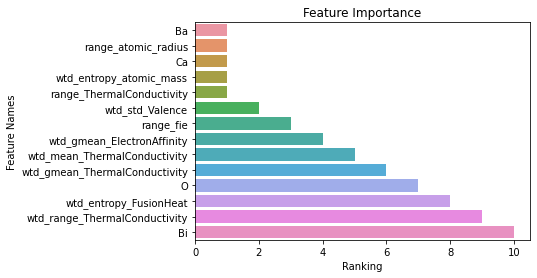

In [57]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_5, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")

#### Ridge

In [36]:
ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, n_jobs=-1, cv=cv, 
                           scoring='neg_root_mean_squared_error')

In [37]:
%%time
grid_result_ridge = grid_search_ridge.fit(X_scaled, y)
# summarize results
print("Best: %f using %s" % (grid_result_ridge.best_score_, grid_result_ridge.best_params_))
means = grid_result_ridge.cv_results_['mean_test_score']
stds = grid_result_ridge.cv_results_['std_test_score']
params = grid_result_ridge.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -17.985715 using {'alpha': 1000}
-22.055795 (9.715597) with: {'alpha': 0.001}
-22.055486 (9.714964) with: {'alpha': 0.01}
-22.052398 (9.708628) with: {'alpha': 0.1}
-22.021668 (9.645628) with: {'alpha': 1}
-21.730446 (9.051705) with: {'alpha': 10}
-19.960120 (5.550029) with: {'alpha': 100}
-19.105150 (3.855031) with: {'alpha': 200}
-18.254187 (1.925468) with: {'alpha': 500}
-17.985715 (0.985223) with: {'alpha': 1000}
CPU times: user 225 ms, sys: 65.7 ms, total: 291 ms
Wall time: 1.58 s


In [38]:
ridge_reg_best = Ridge(alpha = 1000)

# Lasso Regression Model
ridge = ridge_reg_best.fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
ridge_preds = cross_val_predict(ridge, X_scaled, y, cv=cv)
ridge_scores = cross_val_score(ridge, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(ridge_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(ridge_scores))

Average of RMSE for 10 folds:  -17.98571529399673
Standard Deviation of RMSE for 10 folds:  0.9852234415772387


<Figure size 864x576 with 0 Axes>

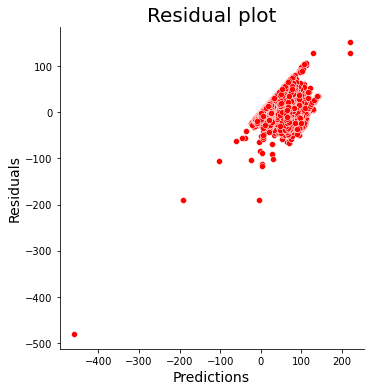

In [58]:
rezdf_ridge = df
rezdf_ridge['preds'] = ridge_preds
rezdf_ridge['resids'] = (rezdf_ridge['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_ridge, color='red')
plt.title('Residual plot', size=20)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

Text(0.5, 0, 'Errors')

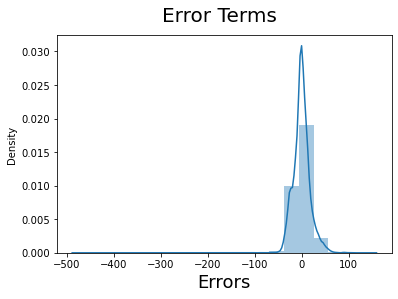

In [40]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_ridge['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [41]:
# intercept and regression model coefficients
coef2_ridge = ridge.coef_.tolist()
coefdf2_ridge = pd.DataFrame(ind_columns, columns=['Variable'])
coefdf2_ridge['Coefficient'] = coef2_ridge

print('Intercept: \n', ridge.intercept_)
coefdf2_ridge

Intercept: 
 34.42121913535249


Variable  Coefficient
0      number_of_elements     1.985758
1        mean_atomic_mass     1.576173
2    wtd_mean_atomic_mass    -2.328760
3       gmean_atomic_mass     0.458908
4     entropy_atomic_mass    -1.457317
..                    ...          ...
130                    Au    -0.419369
131                    Hg     1.493853
132                    Tl     1.175628
133                    Pb     0.379810
134                    Bi     3.719179

[135 rows x 2 columns]

In [42]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=ridge_reg_best, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(X_scaled, y)

RFE(estimator=Ridge(alpha=1000), n_features_to_select=5)

In [43]:
# get column names
columns = pd.DataFrame(list(ind_columns))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                      Feature Name  Ranking
0               number_of_elements        1
108                             Ba        1
48   wtd_gmean_ThermalConductivity        1
46    wtd_mean_ThermalConductivity        1
32        entropy_ElectronAffinity        1
..                             ...      ...
120                             Tm      127
78                              Cr      128
126                             Re      129
104                             Sb      130
65                               F      131

[135 rows x 2 columns]


In [54]:
# Top 5 features
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
108                             Ba        1
18             range_atomic_radius        1
74                              Ca        1
5          wtd_entropy_atomic_mass        1
51       range_ThermalConductivity        1
57                 wtd_std_Valence        2
12                       range_fie        3
31      wtd_gmean_ElectronAffinity        4
46    wtd_mean_ThermalConductivity        5
48   wtd_gmean_ThermalConductivity        6
64                               O        7
41          wtd_entropy_FusionHeat        8
52   wtd_range_ThermalConductivity        9
134                             Bi       10

Text(0, 0.5, 'Feature Names')

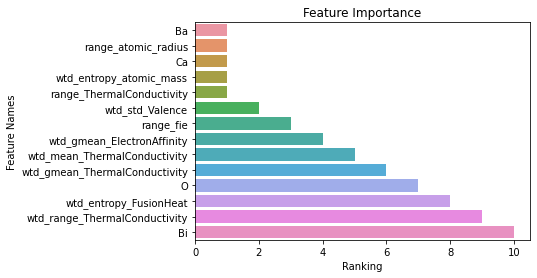

In [55]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_10, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")

#### ElasticNet

In [46]:
# ElasticNet Regression Model
elastic_net = linear_model.ElasticNet().fit(X_scaled, y)
# score the regression model based on Root Mean Squared Error
elastic_net_preds = cross_val_predict(elastic_net, X_scaled, y, cv=cv)
elastic_net_scores = cross_val_score(elastic_net, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv)
print('Average of RMSE for 10 folds: ', np.mean(elastic_net_scores))
print('Standard Deviation of RMSE for 10 folds: ', np.std(elastic_net_scores))

Average of RMSE for 10 folds:  -19.489914398225256
Standard Deviation of RMSE for 10 folds:  0.2783240824570127


<Figure size 864x576 with 0 Axes>

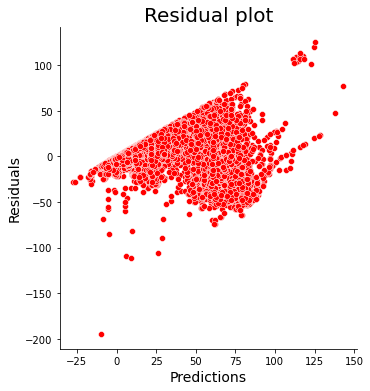

In [47]:
rezdf_elastic_net = df
rezdf_elastic_net['preds'] = elastic_net_preds
rezdf_elastic_net['resids'] = (rezdf_elastic_net['preds'] - y)

# residual plot
fig = plt.figure(figsize = (12, 8))
sns.relplot(x='preds', y='resids', data=rezdf_elastic_net, color='red')
plt.title('Residual plot', size=20)
plt.xlabel('Predictions', size=14)
plt.ylabel('Residuals', size=14);

Text(0.5, 0, 'Errors')

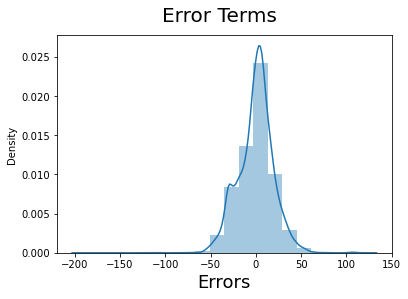

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(rezdf_elastic_net['resids'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [49]:
# intercept and regression model coefficients
coef2_elastic_net = elastic_net.coef_.tolist()
coefdf2_elastic_net = pd.DataFrame(ind_columns, columns=['Variable'])
coefdf2_elastic_net['Coefficient'] = coef2_elastic_net

print('Intercept: \n', elastic_net.intercept_)
coefdf2_ridge

Intercept: 
 34.42121913535249


Variable  Coefficient
0      number_of_elements     1.985758
1        mean_atomic_mass     1.576173
2    wtd_mean_atomic_mass    -2.328760
3       gmean_atomic_mass     0.458908
4     entropy_atomic_mass    -1.457317
..                    ...          ...
130                    Au    -0.419369
131                    Hg     1.493853
132                    Tl     1.175628
133                    Pb     0.379810
134                    Bi     3.719179

[135 rows x 2 columns]

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [50]:
# Instance of Recursive Feature Elimination
rfe = RFE(estimator=elastic_net, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_scaled, y)

RFE(estimator=ElasticNet(), n_features_to_select=5)

In [51]:
# get column names
columns = pd.DataFrame(list(ind_columns))

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
rfe_selected_sorted = rfe_selected.sort_values(by=['Ranking'], ascending=True)
print(rfe_selected_sorted)

                  Feature Name  Ranking
108                         Ba        1
18         range_atomic_radius        1
74                          Ca        1
5      wtd_entropy_atomic_mass        1
51   range_ThermalConductivity        1
..                         ...      ...
56           wtd_range_Valence      127
65                           F      128
121                         Yb      129
66                          Na      130
67                          Mg      131

[135 rows x 2 columns]


In [52]:
df_top_10 = rfe_selected_sorted[(rfe_selected_sorted["Ranking"] < 11)]
df_top_10

Feature Name  Ranking
108                            Ba        1
18            range_atomic_radius        1
74                             Ca        1
5         wtd_entropy_atomic_mass        1
51      range_ThermalConductivity        1
57                wtd_std_Valence        2
12                      range_fie        3
31     wtd_gmean_ElectronAffinity        4
46   wtd_mean_ThermalConductivity        5

Text(0, 0.5, 'Feature Names')

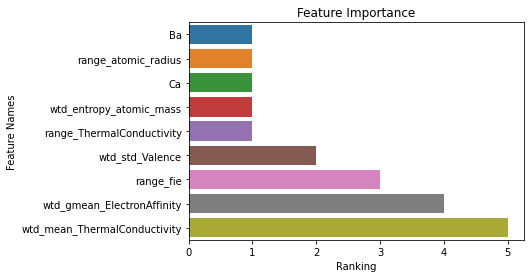

In [53]:
# Visulization of important features 
ax = sns.barplot(x ='Ranking', y = 'Feature Name',data=df_top_10, orient= 'h')
ax.set_title("Feature Importance")
ax.set_xlabel("Ranking")
ax.set_ylabel("Feature Names")